##Arjun tyagi
PRN-(21070126020)
##Stock Price Forecasting with Long Short-Term Memory (LSTM) Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import  yfinance as yf

from pyspark.sql import SparkSession
import yfinance as yf

# Initialize a Spark session
spark = SparkSession.builder.appName('StockPrediction').getOrCreate()


In [ ]:
# Download stock data
start = '2010-01-01'
end = '2024-08-31'
df = yf.download('TATASTEEL.NS', start=start, end=end)

# Convert the downloaded data to a Spark DataFrame
df_spark = spark.createDataFrame(df.reset_index())
df_spark.show()


[*********************100%***********************]  1 of 1 completed


+-------------------+-----------------------------+-------------------------+------------------------+-----------------------+------------------------+--------------------------+
|       ('Date', '')|('Adj Close', 'TATASTEEL.NS')|('Close', 'TATASTEEL.NS')|('High', 'TATASTEEL.NS')|('Low', 'TATASTEEL.NS')|('Open', 'TATASTEEL.NS')|('Volume', 'TATASTEEL.NS')|
+-------------------+-----------------------------+-------------------------+------------------------+-----------------------+------------------------+--------------------------+
|2010-01-04 00:00:00|           19.329814910888672|        60.37968444824219|      60.641685485839844|     58.774322509765625|       59.26021957397461|                  58460615|
|2010-01-05 00:00:00|           19.798004150390625|        61.84213638305664|      62.385196685791016|     60.836997985839844|      60.836997985839844|                  81889733|
|2010-01-06 00:00:00|           19.582969665527344|        61.17045593261719|      62.880619049072266|   

In [ ]:
df=df.reset_index()
df.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS,TATASTEEL.NS
3612,2024-08-26 00:00:00+00:00,155.699997,155.699997,156.399994,153.699997,154.610001,32497603
3613,2024-08-27 00:00:00+00:00,154.699997,154.699997,156.500000,154.600006,155.800003,24523684
3614,2024-08-28 00:00:00+00:00,153.699997,153.699997,155.000000,153.050003,154.699997,25195197
3615,2024-08-29 00:00:00+00:00,152.970001,152.970001,153.559998,151.199997,153.210007,44452983
3616,2024-08-30 00:00:00+00:00,152.759995,152.759995,155.250000,152.470001,153.000000,55134023


In [ ]:
# Convert the Pandas DataFrame to Spark DataFrame and drop columns 'Date' and 'Adj Close'
df_spark = df_spark.drop('Date', 'Adj Close')
df_spark.show()


+-------------------+-----------------------------+-------------------------+------------------------+-----------------------+------------------------+--------------------------+
|       ('Date', '')|('Adj Close', 'TATASTEEL.NS')|('Close', 'TATASTEEL.NS')|('High', 'TATASTEEL.NS')|('Low', 'TATASTEEL.NS')|('Open', 'TATASTEEL.NS')|('Volume', 'TATASTEEL.NS')|
+-------------------+-----------------------------+-------------------------+------------------------+-----------------------+------------------------+--------------------------+
|2010-01-04 00:00:00|           19.329816818237305|        60.37968444824219|      60.641685485839844|     58.774322509765625|       59.26021957397461|                  58460615|
|2010-01-05 00:00:00|           19.798006057739258|        61.84213638305664|      62.385196685791016|     60.836997985839844|      60.836997985839844|                  81889733|
|2010-01-06 00:00:00|            19.58297348022461|        61.17045593261719|      62.880619049072266|   

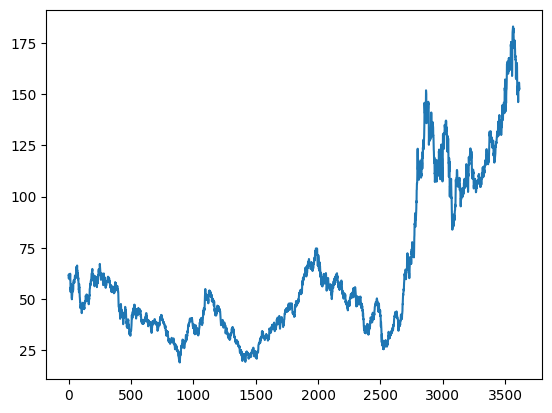

In [ ]:
plt.plot(df.Close)

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Create a window specification for 100-day moving average
window_spec_100 = Window.orderBy('Date').rowsBetween(-99, 0)

# Calculate 100-day moving average for the 'Close' column
df_spark = df_spark.withColumn('ma100', F.avg('Close').over(window_spec_100))
df_spark.select('Close', 'ma100').show()


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Close` cannot be resolved. Did you mean one of the following? [`('Date', '')`, `('Close', 'TATASTEEL.NS')`, `('Low', 'TATASTEEL.NS')`, `('Open', 'TATASTEEL.NS')`, `('Adj Close', 'TATASTEEL.NS')`].;
'Project [('Date', '')#0, ('Adj Close', 'TATASTEEL.NS')#1, ('Close', 'TATASTEEL.NS')#2, ('High', 'TATASTEEL.NS')#3, ('Low', 'TATASTEEL.NS')#4, ('Open', 'TATASTEEL.NS')#5, ('Volume', 'TATASTEEL.NS')#6L, avg('Close) windowspecdefinition('Date ASC NULLS FIRST, specifiedwindowframe(RowFrame, -99, currentrow$())) AS ma100#80]
+- LogicalRDD [('Date', '')#0, ('Adj Close', 'TATASTEEL.NS')#1, ('Close', 'TATASTEEL.NS')#2, ('High', 'TATASTEEL.NS')#3, ('Low', 'TATASTEEL.NS')#4, ('Open', 'TATASTEEL.NS')#5, ('Volume', 'TATASTEEL.NS')#6L], false


NameError: name 'ma100' is not defined

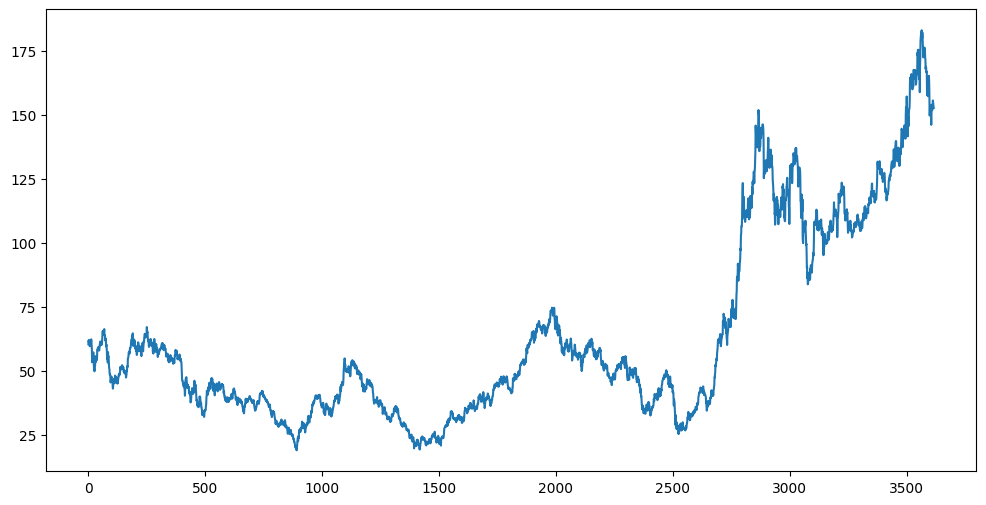

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df. Close)
plt.plot(ma100, 'r')

In [ ]:
# Create a window specification for 200-day moving average
window_spec_200 = Window.orderBy('Date').rowsBetween(-199, 0)

# Calculate 200-day moving average for the 'Close' column
df_spark = df_spark.withColumn('ma200', F.avg('Close').over(window_spec_200))
df_spark.select('Close', 'ma100', 'ma200').show()


,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3612,150.94955
3613,151.12930
3614,151.31480
3615,151.48915


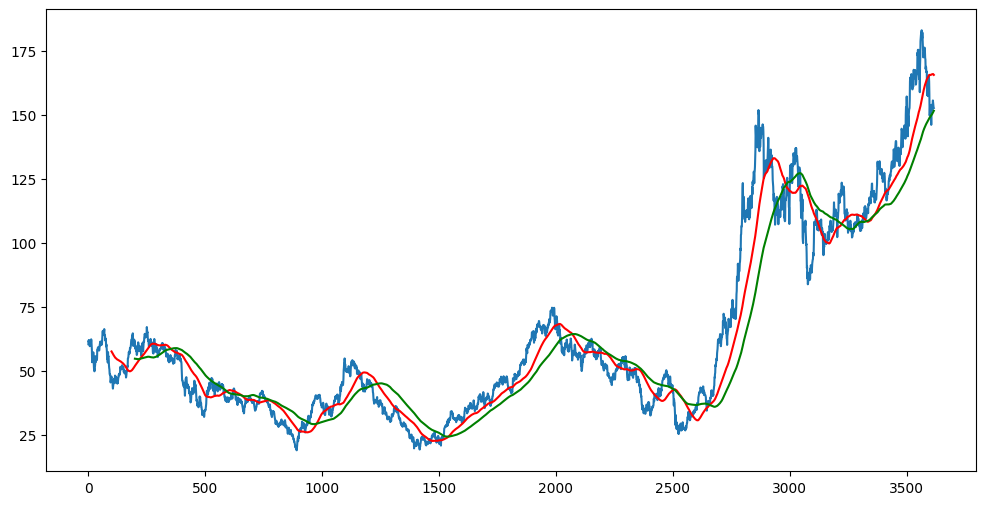

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df. Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:

# Splitting the data into training (78%) and testing (30%) using PySpark
data_training = df_spark.limit(int(df_spark.count() * 0.78))
data_testing = df_spark.subtract(data_training)

# Display the sizes of the training and testing sets
print(f"Training Data Count: {data_training.count()}")
print(f"Testing Data Count: {data_testing.count()}")


(2821, 1)
(1086, 1)


In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors

# Convert 'Close' column into feature vector for PySpark MinMaxScaler
df_training = data_training.select('Close').rdd.map(lambda row: Vectors.dense(row['Close'])).toDF(['features'])

# Initialize MinMaxScaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df_training)

# Transform the training data
scaled_training = scaler_model.transform(df_training)
scaled_training.show()


array([[0.397042  ],
       [0.41103649],
       [0.40460905],
       ...,
       [0.8824903 ],
       [0.87282539],
       [0.88569597]])

In [ ]:
from pyspark.sql import Row

# Collect scaled data as a list of Rows
scaled_data_list = scaled_training.select('scaled_features').rdd.flatMap(lambda row: row).collect()

# Prepare x_train and y_train
x_train = []
y_train = []

for i in range(100, len(scaled_data_list)):
    x_train.append(scaled_data_list[i-100:i])
    y_train.append(scaled_data_list[i])

# Convert lists to PySpark DataFrames if needed for further Spark-based processing
x_train_df = spark.createDataFrame([Row(x=x) for x in x_train])
y_train_df = spark.createDataFrame([Row(y=y) for y in y_train])



In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout (0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout (0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout (0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add (Dropout (0.5))

model.add(Dense(units=1)) # only 1 unit in dense bcuz be have to predict only i value(closing price)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 309ms/step - loss: 0.0016
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 308ms/step - loss: 0.0012
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - loss: 0.0012
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 308ms/step - loss: 0.0013
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 307ms/step - loss: 0.0016
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 294ms/step - loss: 0.0012
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - loss: 0.0011
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 306ms/step - loss: 0.0012
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 305ms/step - loss: 0.0014
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 307ms/step - loss: 0.0014
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 306ms/step - loss: 0.0013
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - loss: 0.0014
Epoch 13/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 309ms/step - loss: 0.0013
Epoch 14/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 308ms/step - loss: 0.0011
Epoch 15/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [ ]:
model.save('keras_model.h5')

In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head() #this will be our testing data input

,Close
0,70.915001
1,70.635002
2,70.589996
3,66.669998
4,68.110001


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.28309542],
       [0.28130692],
       [0.28101944],
       ...,
       [0.81188721],
       [0.80722434],
       [0.80588291]])

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test. shape)

(1086, 100, 1)
(1086,)


In [ ]:
y_predicted=model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step


In [ ]:
y_predicted.shape

(1086, 1)

In [ ]:
y_test

array([0.01226406, 0.01465939, 0.01750184, ..., 0.81188721, 0.80722434,
       0.80588291])

In [ ]:
y_predicted

array([[0.57187706],
       [0.5503426 ],
       [0.49872357],
       ...,
       [0.8736893 ],
       [0.8744034 ],
       [0.87307394]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00638753])

In [ ]:
scale_factor = 1/0.00638753
y_predicted=y_predicted * scale_factor
y_test=y_test * scale_factor

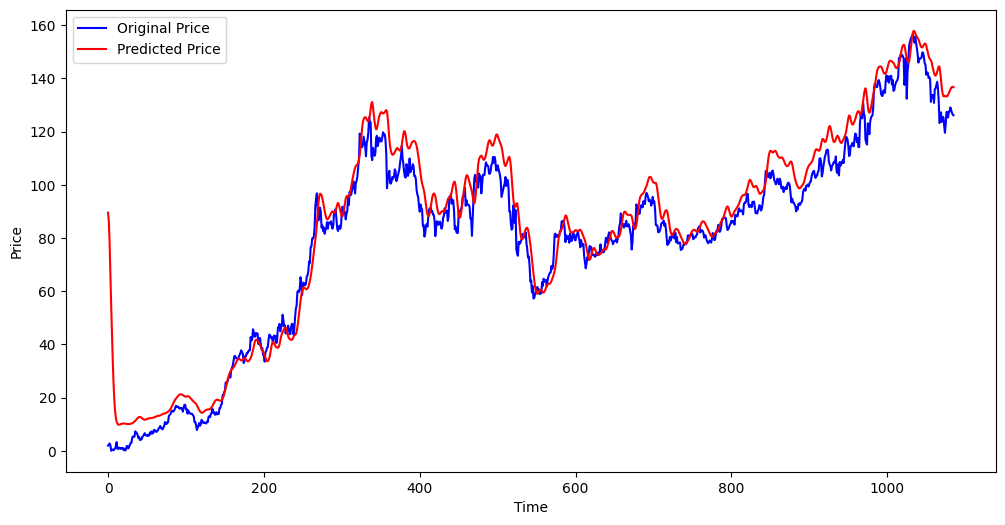

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel("Price")
plt.legend()
plt.show()

In [1]:
#Twitter API credentials
consumer_key= 'J8byEqCJVeadFYXaXXpxB0XPA'
consumer_secret= 'BtCnypxBLpOcjmH40o6sdeFkVtkEVN9ETZVj0fjLyR6kBMAduJ'

access_token='593352028-586dxldnHIrPKM2aSfsq0yJBwe9ulEQNk6LWMlln'
access_token_secret='JOnyIQx4oiR96Sp72vMQwZFJRdoOy2dtCXZqS7kbyrV2k'

num_of_tweets = int(300)

In [2]:

#Setting up modules for Tweepy
import tweepy
from textblob import TextBlob
import nltk
nltk.download('punkt')
class Tweet(object):

    def __init__(self, content, polarity):
        self.content = content
        self.polarity = polarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
def retrieving_tweets_polarity(symbol):

    symbol = stock_full_form['Tatasteel'].to_list()[0][0:12]

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    user = tweepy.API(auth)

    tweets = tweepy.Cursor(user.search, q=symbol, tweet_mode='extended', lang='en',exclude_replies=True).items(num_of_tweets)

    tweet_list = [] #List of tweets alongside polarity
    global_polarity = 0 #Polarity of all tweets === Sum of polarities of individual tweets
    tw_list=[] #List of tweets only => to be displayed on web page
    #Count Positive, Negative to plot pie chart
    pos=0 #Num of pos tweets
    neg=1 #Num of negative tweets
    for tweet in tweets:
        count=20 #Num of tweets to be displayed on web page
        #Convert to Textblob format for assigning polarity
        tw2 = tweet.full_text
        tw = tweet.full_text
        #Clean
        tw=p.clean(tw)
        #print("-------------------------------CLEANED TWEET-----------------------------")
        #print(tw)
        #Replace & by &
        tw=re.sub('&','&',tw)
        #Remove :
        tw=re.sub(':','',tw)
        #print("-------------------------------TWEET AFTER REGEX MATCHING-----------------------------")
        #print(tw)
        #Remove Emojis and Hindi Characters
        tw=tw.encode('ascii', 'ignore').decode('ascii')

        #print("-------------------------------TWEET AFTER REMOVING NON ASCII CHARS-----------------------------")
        #print(tw)
        blob = TextBlob(tw)
        polarity = 0 #Polarity of single individual tweet
        for sentence in blob.sentences:

            polarity += sentence.sentiment.polarity
            if polarity>0:
                pos=pos+1
            if polarity<0:
                neg=neg+1

            global_polarity += sentence.sentiment.polarity
        if count > 0:
            tw_list.append(tw2)

        tweet_list.append(Tweet(tw, polarity))
        count=count-1
    if len(tweet_list) != 0:
        global_polarity = global_polarity / len(tweet_list)
    else:
        global_polarity = global_polarity
    neutral=num_of_tweets-pos-neg
    if neutral<0:
      neg=neg+neutral
      neutral=20
    print()
    print("##############################################################################")
    print("Positive Tweets :",pos,"Negative Tweets :",neg,"Neutral Tweets :",neutral)
    print("##############################################################################")
    labels=['Positive','Negative','Neutral']
    sizes = [pos,neg,neutral]
    explode = (0, 0, 0)
    fig = plt.figure(figsize=(7.2,4.8),dpi=65)
    fig1, ax1 = plt.subplots(figsize=(7.2,4.8),dpi=65)
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    #plt.savefig('static/SA.png')
    #plt.close(fig)
    plt.show()
    if global_polarity>0:
        print()
        print("##############################################################################")
        print("Tweets Polarity: Overall Positive")
        print("##############################################################################")
        tw_pol="Overall Positive"
    else:
        print()
        print("##############################################################################")
        print("Tweets Polarity: Overall Negative")
        print("##############################################################################")
        tw_pol="Overall Negative"


    return global_polarity,tw_list,tw_pol,pos,neg,neutral
